# Lorentz-boosted Setup

<img src='lorentz-boost.png'>

## Particle Initialisation:

$ \gamma_0 = 1/\cos(\theta) $

$ \tilde{v}_0 = v_0/c = \sin(\theta) $

$ \tilde{x}' = \gamma_0^{-1} \tilde{x} $

$ \tilde{t}' = \gamma_0^{-2} \tilde{t} $

$ \tilde{p}_{x,z}' = \tilde{p}_{x,z} $

$ \tilde{p}_y' = \gamma_0 (\tilde{p}_y - \tilde{v}_0 \gamma ) $

$ \gamma' = \gamma_0 (\gamma - \tilde{v}_0 \tilde{p}_y ) $

$ \tilde{n}' = \gamma_0^3 \tilde{n} $

$ q' = q $

$ m' = m $

where tilde denotes Smilei units

--> Initialise all particles with an extra velocity component in y-direction (mean_velocity) and trust Smilei to handle the relativistic velocity addition correctly

## Exponential Profile At Target Front/Back



### Theory for Absorption (p-polarised) (as suggested by Gibbon et al., 2012):

For dimensionless pump strength $a_0 = C_2 \frac{e E_0}{m \omega c}$, the hot electron flux and energy absorption due to a laser impeding on a plasma surface are governed by the following equations:

$ \gamma^2 - 1 - \left( \sin(\theta_0) \frac{f a_0}{C_1 \gamma} + \frac{f^2 a_0^2}{C_1 \gamma} \cos(\theta_0) \right)^2 - \left( \sin(\theta_0)(\gamma-1) - f a_0 \cos(\theta_0) \right)^2 = 0 $

and

$ \kappa = \frac{C_3 (1-1/\gamma)f}{2 \pi a_0} (\tan(\theta_0) + f a_0) $,

where $C_1,C_2,C_3$ are constants to be determined by experimental data, $f=(R+1)$ and $\theta_0$ is the laser incidence angle. Since $f$ is given by the amplitude reflection coefficient, we find $\kappa = 1- (f-1)^2$.
Solving this system of equations for either $\{ f,\gamma \}$ or $\{ \kappa,\gamma \}$ lets us compute the absorption coefficient.

Estimates for $C_1,C_2$ and $C_3$:

$C_2 \approx \omega/\omega_{pe,cold}$

Choosing $C_3/C_1^2 = 2$ reproduces Brunel heating for $a_0 < 1$ and should hence be applied.

$C_1$ can then be determined as $C_1 = \frac{\pi \kappa_{\max}}{1+\sqrt{1-\kappa_\max}} $ from studying the asymptotic behaviour of $\kappa$. $\kappa_\max = \kappa(\theta_0 = 0, a_0 \rightarrow \infty)$ describes the maximum absorption coefficient and should be chosen around 0.1 for clean plasmas and 0.8 for the presence of a preplasma.

The solution for the system of equations can be found using scipy.optimize.fsolve

### Theory for Absorption (s-polarised) (as suggested by Eliezer, 2001):

$ f_a = 1 - \frac{| E_{out} |^2}{|E_{in}|^2} = 1- \exp \left( - \frac{32 \nu_c L \cos^5(\theta_0)}{15c} \right) $

where $\nu_c$ is the electron-ion collision frequency at critical density and $L$ is the length from the beginning of the plasma to the critical density.

Since this will be used for pre-plasma Temperature gauging the $1-\exp(- \cos^5(\theta_0))$ scaling will be used.

--> Attempt to include actual values in the formula gave a term of $\exp(-10^{32})$. Hence a constant absorption for all angles will be used.

### Theory for Electron Temperature after Prepulse (as suggested by Esirkepov et al., 2014):

$ T_e = \left( 5.1 \sqrt{\frac{a_0^2}{C_I}} + 1.3 \left( \frac{n_e}{10^{21} \text{cm}^{-3}} \frac{\Delta t}{1 \text{ns}} \frac{a_0^2}{C_I} \right)^{2/5} \right) \times 10^5 $ eV,

where $C_I$ is the pre-pulse-main-pulse contrast and $\Delta t$ is the pre-pulse duration.

--> Problem: No angle dependance included
--> Possible Solution: Compare absorption coefficients for clean plasma (see above)

--> For now 10 keV used.

### Scale-length according to Gibbon in Laser-Matter Interaction book:

$ L = c_s \tau_L \approx 3 \sqrt{\frac{T_e}{\text{keV}}} \cdot \sqrt{\frac{Z^*}{A}} \cdot \tau_\text{fs} \cdot 10^{-10} $


## Target/Laser Parameters

### Geometry

| $d_1$ | $d_2$ | $d_3$  | EM-Boundary | Particle Boundary | $\Delta x$ | $T$  | CFL |
|:-------|:-------|:--------|:-------------|:-------------------|:------------|:------|----|
| 6 µm  | 3 µm | 16 µm | open        | open              | $\lambda_D/2$      | 1 ps  | 0.98 |

### Laser

| $\lambda_L$ | $f$     | $a_0$ | $\tau_p$ | FWHM           |
|:-----------|:---------|:-------|:----------|:----------------|
| 520 nm    | 577 THz | 2.7 | 115 fs | $\tau_p$ |

### Plasma (first only electrons and protons)

| $n_p$             | $T_e$  | $T_i$ | $\lambda_D$ | $\delta_\text{skin}$ |
|:-------------------|:--------|:-------|:-------------|:------------|
| 2.43 $\cdot 10^{22}$ cm${}^{-3}$ | 6.8 keV | zero  | 3.93 nm     | 50 nm      |

## Back Transformation

Record all particle momenta $\tilde{\vec{p}}'$ at time $\tilde{t}_\text{acc}$ (see Zsolt) and perform the reverse Lorentz-Boost:

$ E_{kin} = \gamma_0 m_e c^2 \left( \sqrt{\tilde{p}'^2 + \frac{m_0^2}{m_e^2}} + \tilde{v}_0 \tilde{p}_y' \right) - m_0 c^2 $

### Absorption rate from data (as suggested by Gibbon et al. in the BOPS-manual version 3.4):

"The absorbed wave energy ist just the Poynting flux at the left-hand boundary:

$ P' = E_y' B_z' = (F'^+)^2 - (F'^-)^2 $,

where $F'^+ = E_y' + B_z'$ and $F'^- = E_y' - B_z'$. In the lab frame, the Poynting flux is reduced by $\gamma_0$, ie:

$ P_x = P' \cos(\theta) = E_y B_z = E_L B_z \cos(\theta) $,

which in terms of normalised quanitities means that:

$ \tilde P_x = \tilde{E}_y \tilde{B}_z = \tilde{E}_y' \tilde{B}_z' / \gamma_0 = \tilde{P}' /\gamma_0 $"

--> Since the relative absorption depends on $P/P_{in}$ the $\gamma_0$ dependancy should cancel out and it should be fine to use the boost quantities.

### Loading of particle data (of particles with positive px and x behind the target):

In [23]:
import numpy as np
import happi
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.optimize import curve_fit, fsolve
import scipy.integrate as integrate

# List of units
unitlist = [
    "um",
    "V/m",
    "fs",
    "eV",
    "eV**(-1)*m**(-3)",
    "eV*m**(-3)",
    "J*m**(-2)",
    "m**(-3)",
]

# List of constants
epsilon0 = const.epsilon_0  # Vaccuum permittivity
me = const.m_e  # Electron mass
mp = const.m_p  # Proton mass
e = const.e  # Elemantary charge
c0 = const.c  # Speed of liexit
mu0 = const.mu_0  # Vacuum permeability
lambdal = 520e-9  # Laser wavelength
omegal = 2.0 * np.pi * c0 / lambdal  # Laser radial frequency

# Loading data from simulation

S = happi.Open("./40deg/")
frontdist = S.namelist.frontdist
plasmathick = S.namelist.plasmathick
gamma0 = S.namelist.gamma0
theta = S.namelist.theta

eleclo = S.TrackParticles(
    species="electrons",
    select="any(t>0, (px>0)*(x>" + str((frontdist + plasmathick)) + ")*(w>0))",
    axes=["x", "px", "py", "pz", "w"],
    sort=True,
).getData()
ionslo = S.TrackParticles(
    species="ions",
    select="any(t>0, (px>0)*(x>" + str((frontdist + plasmathick)) + ")*(w>0))",
    axes=["x", "px", "py", "pz", "w"],
    sort=True,
).getData()

Loaded simulation './40deg/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Selecting particles ... (this may take a while)
   Selecting block `any(t>0, (px>0)*(x>64.79306601454255)*(w>0))`, at time 58025
Removing dead particles ...
Kept 394000 particles
Loading data ...
   axis: x
   axis: px
   axis: py
   axis: pz
   axis: w
Process broken lines ...
... done
Selecting particles ... (this may take a while)
   Selecting block `any(t>0, (px>0)*(x>64.79306601454255)*(w>0))`, at time 58025
Removing dead particles ...
Kept 1405000 particles
Loading data ...
   axis: x
   axis: px
   axis: py
   axis: pz
   axis: w
Process broken lines ...
... done


In [24]:
gamma0

1.3054072893322786

In [25]:
refl = c0 / omegal  # SMILEI reference length c/omegaL
reft = 1 / omegal  # SMILEI reference time 1/omegaL
refn = epsilon0 * me * (omegal**2.0) / (e**2.0)  # SMILEI reference particle density
refk = me * c0**2.0  # SMILEI reference energy
refq = e  # SMILEI reference charge
refm = me  # SMILEI reference mass
refv = c0  # SMILEI reference velocity

exec(
    open("../smileianalysispythonfunctions.py").read()
)  # Running a file which contains many functions used for this notebook

### Re-transform to the lab system and obtaining particle kinetic energies:

In [26]:
def ekindirect(pdata, m, gamma0, theta):
    # Compute the kinetic energy directly from the particle momenta in the simulation frame in smilei units
    px = pdata["px"].flatten()
    py = pdata["py"].flatten()
    pz = pdata["pz"].flatten()
    en = np.zeros((px.shape[0]))
    for i in range(px.shape[0]):
        en[i] = (
            gamma0
            * me
            * c0**2
            * (
                np.sqrt((px[i] ** 2 + py[i] ** 2 + pz[i] ** 2) + m**2 / (me**2))
                + np.sin(theta) * py[i]
            )
            - m * c0**2
        ) / e
    return en

In [28]:
enions = ekindirect(ionslo, mp, gamma0, theta)
enions = enions[~np.isnan(enions)]

enelec = ekindirect(eleclo, me, gamma0, theta)
enelec = enelec[~np.isnan(enelec)]

In [29]:
print("The maximum ion energy is " + str(np.amax(enions) * 1e-6) + " MeV")

The maximum ion energy is 14.828892941995882 MeV


### Binning and creating energy spectrum graph:

In [30]:
num_bins = 400
# bin_width = (30*refk/e)/num_bins
bin_width = (15e6) / num_bins
bins = [(i * bin_width, (i + 1) * bin_width) for i in range(num_bins)]

In [2]:
def fillbins2(energies, binwidth, binnumber, lorentzdict):
    # Go through each energy entry and place it in the appropriate bin (FASTER VERSION)
    filled = np.zeros((binnumber))
    weights = lorentzdict["w"].flatten()
    for i in range(len(energies)):
        if int(energies[i] / binwidth) < binnumber:
            index = int(energies[i] / binwidth)
            filled[index] = filled[index] + weights[i] / (gamma0**2) * refl * refn
    return filled / binwidth

In [32]:
electroncounts = fillbins2(enelec, bin_width, num_bins, eleclo)

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
ioncounts = fillbins2(enions, bin_width, num_bins, ionslo)

In [ ]:
def gamma(E):
    # Lorentz-factor for given kinetic energy E in MeV for protons
    return np.sqrt(
        1
        + 1
        / (mp**2 * c0**4)
        * ((E * 1e6 * e) ** 2 + 2 * E * 1e6 * e * mp * c0**2)
    )


def maxjutt(E, a, kT):
    # Maxwell-Jüttner distribution for given kinetic energy E in MeV for protons, log
    return a - gamma(E) * mp * c0**2 / kT


def maxwellian(E, a, kT):
    # Maxwellian energy distribution for given kinetic energy E in MeV, log
    return a + np.log(np.sqrt(E * 1e6 * e)) - (E * 1e6 * e) / kT


def mora(E, a, kT):
    # Mora predicted distribution with fit parameter for N_0 for given kinetic energy E in MeV, log
    return a - np.log(np.sqrt(2 * E * e * 1e6 * kT)) - np.sqrt(2 * E * e * 1e6 / kT)


def truemora(E, kT):
    # Mora predicted distribution for given kinetic energy E in MeV, log
    return np.log(
        S.namelist.partden
        * refn
        * gamma0 ** (-3)
        * S.namelist.cs
        * S.namelist.tacc
        / np.sqrt(2 * E * e * 1e6 * kT)
    ) - np.sqrt(2 * E * e * 1e6 / kT)

In [ ]:
x = np.array([(bins[i][0] + bin_width / 2) * 1e-6 for i in range(num_bins)])
# xc= (np.linspace(0,30,100)*refk/e/1e6)+0.3/2.*refk/e/1e6

rightb = rightestnonzero(ioncounts)
# controlspec = np.loadtxt('../2D-ControlSim/2Denspecions.txt')

# popt1, pcov1 = curve_fit(predspec, x[6:rightb-1], ioncounts[6:rightb-1]/(S.namelist.length*refl), p0=[1e4,3e-14], maxfev=10000)
# popt2, pcov2 = curve_fit(doublepredspec, x[6:rightb-1], ioncounts[6:rightb-1]/(S.namelist.length*refl), p0=[1e-14, 1e-13, 1e5, 1e5], maxfev=10000)
# print('kT from fit 1:', popt1[1], '-> equivalent to electron temperature of', popt1[1]/e/1e6, 'MeV')
# print('The scaling factor is', popt1[0])

# print('kT from fit1:', popt2[2],'-> equivalent to electron temperature of', popt2[2]/e/1e6, 'MeV')
# print('kT from fit2:', popt2[3],'-> equivalent to electron temperature of', popt2[3]/e/1e6, 'MeV')
# print('The scaling factors are', popt2[0],'and', popt2[1])

# First fit one temperature to the left side of the plot, then the other to the right.
# Then fit the combined function using the temperatures from the first fit to find the ratio.

popt1, pcov1 = curve_fit(
    mora,
    x[1 : rightb - 1],
    np.log(ioncounts[1 : rightb - 1] / (S.namelist.length * refl * gamma0)),
    p0=[1, 3e-14],
    maxfev=10000,
)
# popt2, pcov2 = curve_fit(mora, x[int(-rightb/6):rightb-1], np.log(ioncounts[int(-rightb/6):rightb-1]/(S.namelist.length*refl)), p0=[1,3e-14], maxfev=10000)

print(
    "kT from fit1:",
    popt1[1],
    "-> equivalent to electron temperature of",
    popt1[1] / e / 1e6,
    "MeV",
)
# print('kT from fit2:', popt2[1],'-> equivalent to electron temperature of', popt2[1]/e/1e6, 'MeV')


def doublemora(E, a, b):
    return a * (
        1 / np.sqrt(E * e * 1e6) * np.exp(-np.sqrt(2 * E * e * 1e6 / popt1[1]))
    ) + b * (1 / np.sqrt(E * e * 1e6) * np.exp(-np.sqrt(2 * E * e * 1e6 / popt2[1])))


def doublemaxjutt(E, a, b):
    return a * np.exp(-gamma(E) * mp * c0**2 / popt1[1]) + b * np.exp(
        -gamma(E) * mp * c0**2 / popt2[1]
    )


def doublemaxwellian(E, a, b):
    return a * np.sqrt(E * 1e6 * e) * np.exp(-(E * 1e6 * e) / popt1[1]) + b * np.sqrt(
        E * 1e6 * e
    ) * np.exp(-(E * 1e6 * e) / popt2[1])


# popt3, pcov3 = curve_fit(doublemora, x[6:rightb-1], ioncounts[6:rightb-1]/(S.namelist.length*refl), p0=[1e5,1e5], maxfev=10000)

# print('The scaling factors are', popt3[0],'and', popt3[1],'; the ratio is',popt3[0]/popt3[1])

plt.figure(dpi=200)
plt.plot(
    x[: rightb + 2],
    ioncounts[: rightb + 2] / (S.namelist.length * refl * gamma0),
    label="Simulation",
)
plt.plot(x[: rightb + 2], np.exp(mora(x[: rightb + 2], *popt1)), label="Mora-Model Fit")
# plt.axvline(x=11.76, c='k', linewidth=1, linestyle='--')
# plt.plot(x[:-60],((ioncounts[:-60]/ioncounts[1])/(controlspec[:-60]/controlspec[1]))**(1/(ioncounts[:-60]/ioncounts[1])), label='(a-b)/a')
plt.yscale("log")
# plt.title('TNSA Protons Energy Spectrum')
plt.xlabel("$E$ [MeV]")
plt.ylabel("$dn/dE$ [eV$^{-1} \cdot$m$^{-3}$]")
plt.legend()
plt.show
plt.savefig("40degEnSpec.pdf")

In [ ]:
x = np.array([(bins[i][0] + (bin_width / 2)) * 1e-6 for i in range(num_bins)])

rightb = rightestnonzero(electroncounts)

plt.figure(dpi=150)
plt.plot(
    x[0 : rightb + 2],
    electroncounts[0 : rightb + 2] / (S.namelist.length * refl),
    label="Lorentz-boosted °",
)
# plt.axvline(x=50*bin_width*1e-6, c='k', linewidth=1, linestyle='--')
# plt.axvline(x=51*bin_width*1e-6, c='k', linewidth=1, linestyle='--')
# plt.axvline(x=52*bin_width*1e-6, c='k', linewidth=1, linestyle='--')
# plt.axvline(x=53*bin_width*1e-6, c='k', linewidth=1, linestyle='--')
# plt.axvline(x=54*bin_width*1e-6, c='k', linewidth=1, linestyle='--')
# plt.axvline(x=55*bin_width*1e-6, c='k', linewidth=1, linestyle='--')
# plt.axvline(x=56*bin_width*1e-6, c='k', linewidth=1, linestyle='--')
# plt.axvline(x=57*bin_width*1e-6, c='k', linewidth=1, linestyle='--')
# plt.axvline(x=10*0.3*refk/e/1e6, c='r', linewidth=1, linestyle='--')
# plt.axvline(x=11*0.3*refk/e/1e6, c='r', linewidth=1, linestyle='--')
# plt.axvline(x=12*0.3*refk/e/1e6, c='r', linewidth=1, linestyle='--')
plt.yscale("log")
plt.title("Electron Energy Spectrum")
plt.xlabel("$E$ [MeV]")
plt.ylabel("$dn/dE$ [eV$^{-1} \cdot$m$^{-3}$]")
plt.legend()
plt.show
# plt.savefig('ZeroDegreeControl-ElectronEnSpec.jpg')

### Absorption

In [14]:
c0 = const.c  # Speed of light
omegal = 2.0 * np.pi * c0 / 520e-9  # Laser radial frequency
tl = happi.Open("./0deg").namelist.tl / omegal  # 0 degree laser pulse duration
Tsim = happi.Open("./0deg").namelist.Tsim / omegal  # 0 degree simulation time
partden = happi.Open("./0deg").namelist.partden * refn  # 0 degree particle density
aL = happi.Open("./0deg").namelist.aL  # 0 degree laser amplitude


def tgaussian(t, center=0.0, order=2.0, fwhm=50e-15):
    # tgaussian time profile from Smilei; written in short
    return np.exp(-((t - center) ** order) / ((0.5 * fwhm) ** order / np.log(2.0)))


def step(t, x1, x2):
    # rectangle step function
    return np.heaviside(t - x1, 0.5) * np.heaviside(-(t - x2), 0.5)


def poymag(t, duration=0.0, fwhm=50e-15, center=0.0, a0=1.0, omega=1.0):
    # Magnitude of the poynting vector of the incoming laser for gaussian envelope
    return (
        1
        / (mu0 * c0)
        * (me * omega * c0 / e) ** 2
        * a0**2
        * np.sin(omega * t) ** 2
        * tgaussian(t, center=center, fwhm=fwhm) ** 2
        * step(t, 0, duration)
    )


def poymagav(t, duration=0.0, fwhm=50e-15, center=0.0, a0=1.0, omega=1.0):
    # Magnitude of the poynting vector of the incoming laser for gaussian envelope (time-avergaed Poynting used)
    return (
        0.5
        / (mu0 * c0)
        * (me * omega * c0 / e) ** 2
        * a0**2
        * tgaussian(t, center=center, fwhm=fwhm) ** 2
        * step(t, 0, duration)
    )


def intpoy(phi):
    # Incoming Poynting integral depending on incidence angle phi
    return integrate.quad(
        lambda t: poymagav(
            t,
            duration=2 * tl,
            fwhm=tl,
            center=tl,
            a0=S.namelist.aL,
            omega=omegal * np.cos(phi * np.pi / 180),
        ),
        0,
        Tsim,
    )[0] * np.cos(phi * np.pi / 180) ** (-2)

Loaded simulation './0deg'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Loaded simulation './0deg'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Loaded simulation './0deg'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Loaded simulation './0deg'
Scanning for Scalar diagn

<function matplotlib.pyplot.show(close=None, block=None)>

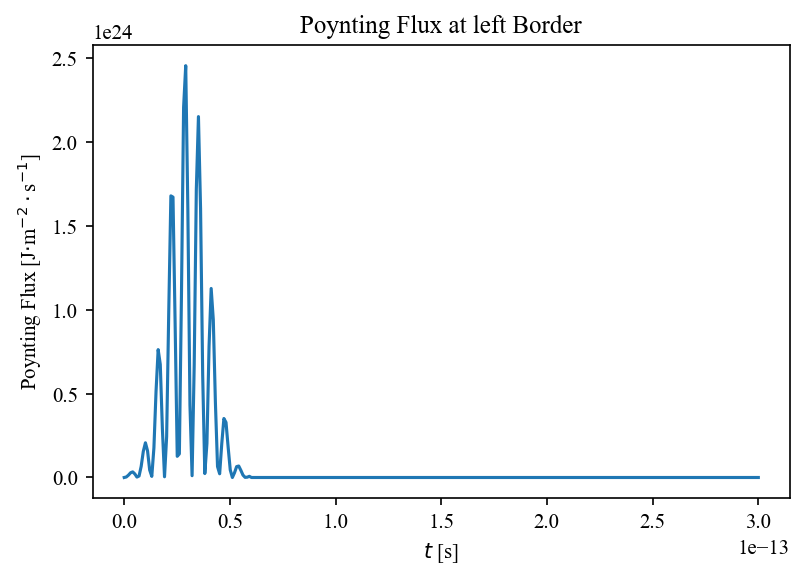

In [15]:
x = np.linspace(0, 300e-15, 300)

plt.figure(dpi=150)
plt.plot(
    x,
    poymag(
        x,
        duration=2 * S.namelist.tl * reft * gamma0**2,
        fwhm=S.namelist.tl * reft * gamma0**2,
        center=S.namelist.tl * reft * gamma0**2,
        a0=S.namelist.aL,
        omega=omegal,
    ),
)
# plt.yscale("log")
plt.title("Poynting Flux at left Border")
plt.xlabel("$t$ [s]")
plt.ylabel("Poynting Flux [J$\cdot$m$^{-2}\cdot$s$^{-1}$]")
plt.show
# plt.savefig('Poynting-LeftBorder-ZeroDeg.jpg')

In [16]:
# angles = np.arange(0,90,5)
angles = np.array(
    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
)

poyall = np.zeros((len(angles)))

for phi in angles:
    poyall[np.where(angles == phi)[0][0]] = (
        happi.Open(
            "./" + str(phi) + "deg",
            reference_angular_frequency_SI=omegal * np.cos(phi * np.pi / 180.0),
        )
        .Scalar("PoyXmin", units=unitlist)
        .getData()[-1]
        * np.cos(phi * np.pi / 180.0) ** (-2)
        / intpoy(phi)
    )


# poy0  = S.Scalar('PoyXmin', units=unitlist)

Loaded simulation './0deg'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Loaded simulation './5deg'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Loaded simulation './10deg'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Loaded simulation './15deg'
Scanning for Scalar dia

In [17]:
eighty = (
    happi.Open(
        "./80deg", reference_angular_frequency_SI=omegal * np.cos(80 * np.pi / 180.0)
    )
    .Scalar("PoyXmin", units=unitlist)
    .getData()
)

Loaded simulation './80deg'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics


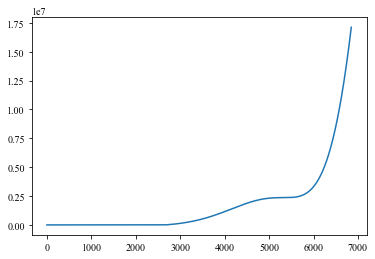

In [18]:
b = 6850
plt.plot(range(len(eighty[:b])), eighty[:b])
poyall[-2] = eighty[b] * np.cos(80 * np.pi / 180.0) ** (-2) / intpoy(80)

In [19]:
def maxionen(angle):
    s = happi.Open("./" + str(angle) + "deg")
    back = s.namelist.frontdist + s.namelist.plasmathick
    ionen = ekindirect(
        s.TrackParticles(
            species="ions",
            select="any(t>0, (px>0)*(x>" + str(back) + ")*(w>0))",
            axes=["x", "px", "py", "pz", "w"],
            sort=True,
        ).getData(),
        mp,
        1 / np.cos(angle * np.pi / 180),
        angle * np.pi / 180,
    )
    ionen = ionen[~np.isnan(ionen)]
    return np.amax(ionen) * 1e-6

In [20]:
maxenergies = np.array([maxionen(alpha) for alpha in angles])

Loaded simulation './0deg'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Selecting particles ... (this may take a while)
   Selecting block `any(t>0, (px>0)*(x>84.58134067357136)*(w>0))`, at time 68331


C:\Users\dkreu\anaconda3\lib\site-packages\happi\_Diagnostics\TrackParticles.py:45: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = self._h5py.File(orderedfile)


Removing dead particles ...
Kept 1491000 particles
Loading data ...
   axis: x
   axis: px
   axis: py
   axis: pz
   axis: w
Process broken lines ...
... done
Loaded simulation './5deg'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Selecting particles ... (this may take a while)
   Selecting block `any(t>0, (px>0)*(x>84.25948313650349)*(w>0))`, at time 68169
Removing dead particles ...
Kept 1480000 particles
Loading data ...
   axis: x
   axis: px
   axis: py
   axis: pz
   axis: w
Process broken lines ...
... done
Loaded simulation './10deg'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diag

Removing dead particles ...
Kept 1241000 particles
Loading data ...
   axis: x
   axis: px
   axis: py
   axis: pz
   axis: w
Process broken lines ...
... done
Loaded simulation './75deg'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Selecting particles ... (this may take a while)
   Selecting block `any(t>0, (px>0)*(x>21.89126182662474)*(w>0))`, at time 30686
Removing dead particles ...
Kept 1319000 particles
Loading data ...
   axis: x
   axis: px
   axis: py
   axis: pz
   axis: w
Process broken lines ...
... done
Loaded simulation './80deg'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance dia

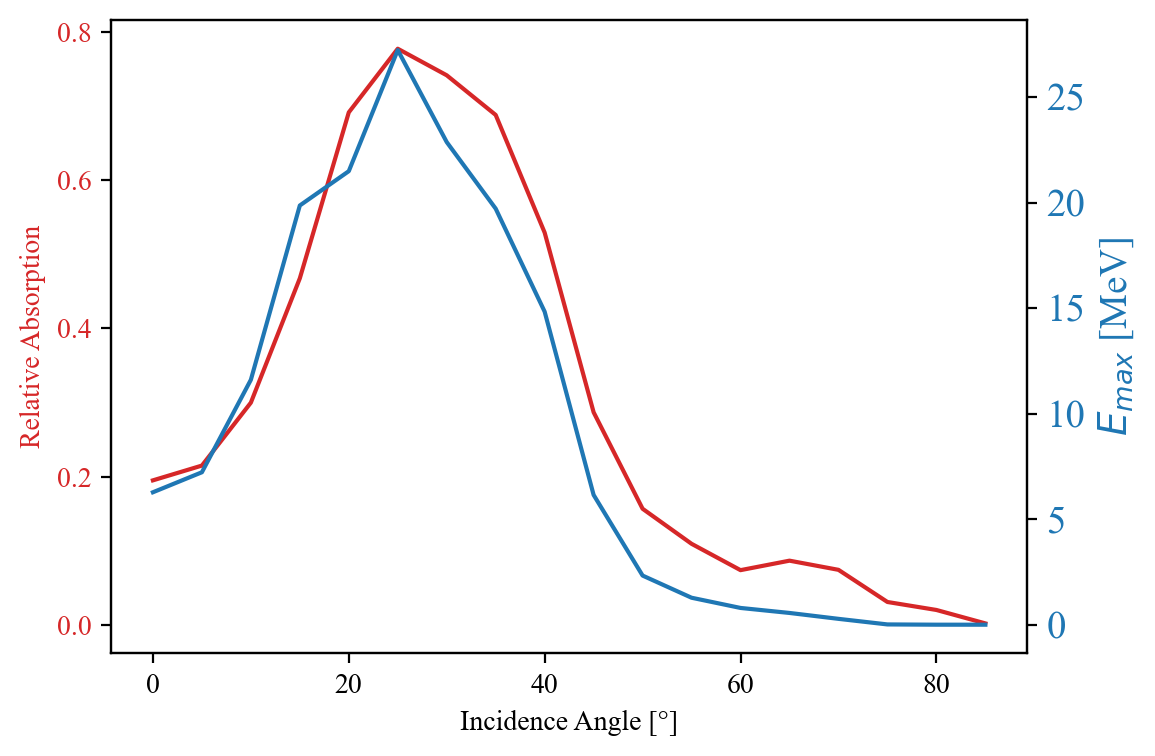

In [21]:
def align_yaxis_np(ax1, ax2):
    """Align zeros of the two axes, zooming them out by same ratio"""
    axes = np.array([ax1, ax2])
    extrema = np.array([ax.get_ylim() for ax in axes])
    tops = extrema[:, 1] / (extrema[:, 1] - extrema[:, 0])
    # Ensure that plots (intervals) are ordered bottom to top:
    if tops[0] > tops[1]:
        axes, extrema, tops = [a[::-1] for a in (axes, extrema, tops)]

    # How much would the plot overflow if we kept current zoom levels?
    tot_span = tops[1] + 1 - tops[0]

    extrema[0, 1] = extrema[0, 0] + tot_span * (extrema[0, 1] - extrema[0, 0])
    extrema[1, 0] = extrema[1, 1] + tot_span * (extrema[1, 0] - extrema[1, 1])
    [axes[i].set_ylim(*extrema[i]) for i in range(2)]


x = np.linspace(0, 85, 100)

fig, ax1 = plt.subplots()

fig.dpi = 200

plt.rcParams["font.size"] = "14"

color = "tab:red"
ax1.set_xlabel("Incidence Angle [°]")
ax1.set_ylabel("Relative Absorption", color=color)
# ax1.plot(x, 0.91*phi(x), '--', label="Resonance Absorption", color='tab:green')
# ax1.plot(x, expbell(x,*polyparams), '--', label="Other Effects", color='tab:purple')
ax1.plot(angles, poyall, color=color)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axis that shares the same x-axis

color = "tab:blue"
ax2.set_ylabel("$E_{max}$ [MeV]", color=color)
ax2.plot(angles, maxenergies, color=color)
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# plt.plot(angles, poyall-phi(angles), label="Difference")
# plt.plot(x,absfunc(x*np.pi/180, 0.28105), label="Gibbon Abs.")
# plt.plot(x, etavh(x*np.pi/180), label="Brunel Heating ($a_0 \gg 1$)")
# plt.plot(x, etavh(x*np.pi/180)*phi(x), label="BH $\cdot$ RA")
# ax1.axhline(y=0, c='k', linewidth=1, linestyle='--')
# plt.yscale("log")
align_yaxis_np(ax1, ax2)
# plt.title('Angle Scans')
# ax1.legend()
# plt.show
plt.savefig("p-pol-absvsenmax.svg")

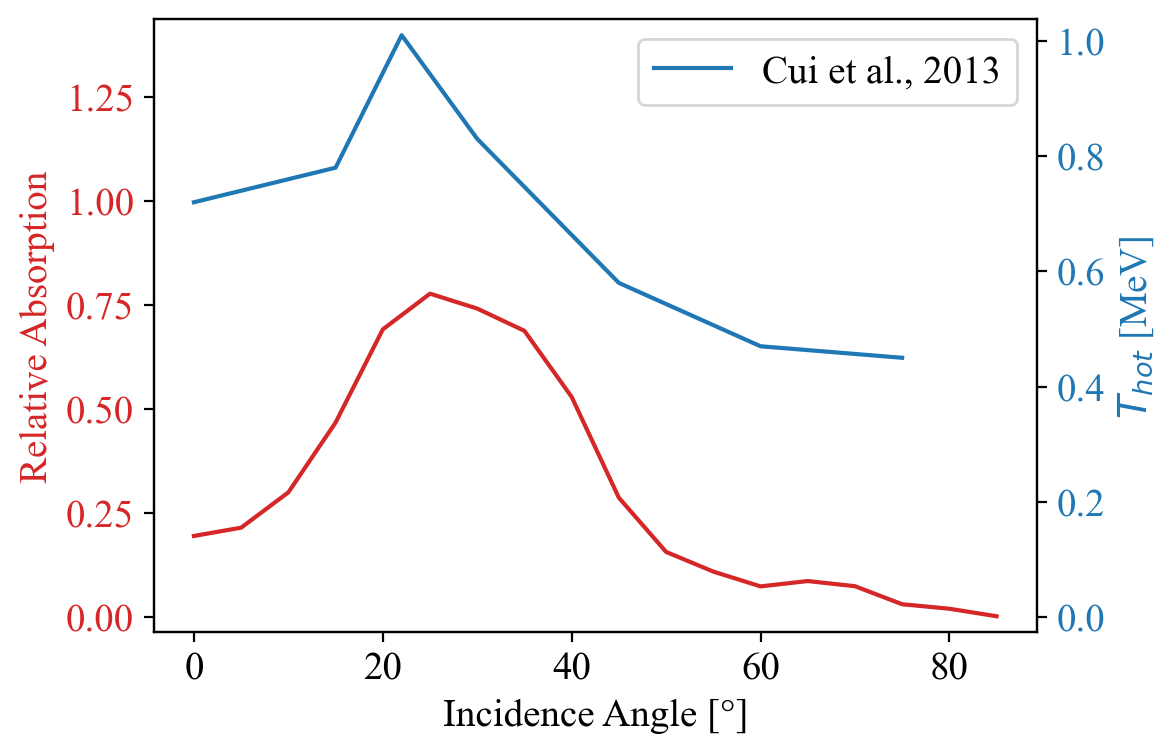

In [54]:
x = np.linspace(0, 85, 100)

fig, ax1 = plt.subplots()

fig.dpi = 200

plt.rcParams["font.size"] = "14"

color = "tab:red"
ax1.set_xlabel("Incidence Angle [°]")
ax1.set_ylabel("Relative Absorption", color=color)
# ax1.plot(x, 0.91*phi(x), '--', label="Resonance Absorption", color='tab:green')
# ax1.plot(x, expbell(x,*polyparams), '--', label="Other Effects", color='tab:purple')
ax1.plot(angles, poyall, color=color)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axis that shares the same x-axis

color = "tab:blue"
ax2.set_ylabel("$T_{hot}$ [MeV]", color=color)
ax2.plot(
    [0, 15, 22, 30, 45, 60, 75],
    [0.72, 0.78, 1.01, 0.83, 0.58, 0.47, 0.45],
    color=color,
    label="Cui et al., 2013",
)
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# plt.plot(angles, poyall-phi(angles), label="Difference")
# plt.plot(x,absfunc(x*np.pi/180, 0.28105), label="Gibbon Abs.")
# plt.plot(x, etavh(x*np.pi/180), label="Brunel Heating ($a_0 \gg 1$)")
# plt.plot(x, etavh(x*np.pi/180)*phi(x), label="BH $\cdot$ RA")
# ax1.axhline(y=0, c='k', linewidth=1, linestyle='--')
# plt.yscale("log")
align_yaxis_np(ax1, ax2)
# plt.title('Angle Scans')
# ax1.legend()
ax2.legend()
# plt.show
plt.savefig("p-pol-absvscui.svg")

In [22]:
poyall

array([0.19486142, 0.21479991, 0.29972234, 0.46754679, 0.69150819,
       0.77738456, 0.74153816, 0.68800749, 0.52920163, 0.28674642,
       0.15652314, 0.10922275, 0.07365844, 0.08646194, 0.0740988 ,
       0.0307053 , 0.01992739, 0.00180559])

In [23]:
# Classic Resonance Absorption (Desinov 1957; Ginzburg 1964) from Gibbon book
def xi(alpha):
    return (4.263123799e-7 * 2 * np.pi / 520e-9) ** (1 / 3) * np.sin(alpha)


def phi(alpha):
    return (
        0.5
        * (
            2.3
            * xi(alpha * np.pi / 180)
            * np.exp(-2 * xi(alpha * np.pi / 180) ** 3 / 3)
        )
        ** 2
    )


# Brunel Heating from Gibbon book
def etaa(theta):
    return 4 / np.pi * aL * np.sin(theta) ** 3 / np.cos(theta)


def etab(theta):
    f = 1 + (1 - etaa(theta)) ** 0.5
    return (
        1
        / (np.pi * aL)
        * f
        * ((1 + f**2 * aL**2 * np.sin(theta) ** 2) ** 0.5 - 1)
        * np.sin(theta)
        / np.cos(theta)
    )


# relativistic limit Brunel
def etavh(theta):
    alpha = np.sin(theta) ** 2 / np.cos(theta)
    return 4 * np.pi * alpha / ((np.pi + alpha) ** 2)

In [24]:
angleswithoutresabs = poyall - 0.91 * phi(angles)

In [25]:
etavh(np.pi / 4)

0.5998834410999071

In [26]:
spolabs = np.loadtxt("../s-pol/spolabs.txt")

<function matplotlib.pyplot.show(close=None, block=None)>

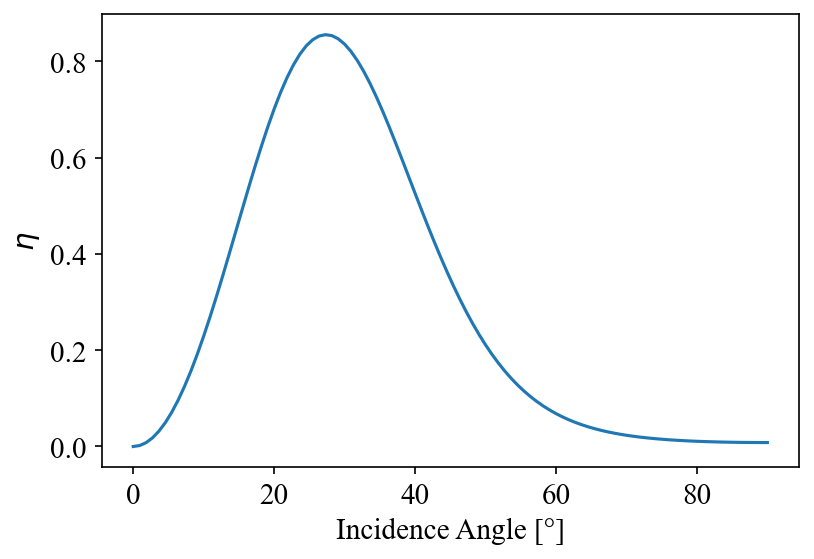

In [27]:
x = np.linspace(0, 90, 100)
plt.figure(dpi=150)
# plt.plot(angles, poyall-spolabs, label="Simulation (p-pol - s-pol)")
plt.plot(x, phi(x), label="Resonance Absorption")
# plt.plot(angles, poyall-phi(angles), label="Difference")
# plt.plot(x,absfunc(x*np.pi/180, 0.28105), label="Gibbon Abs.")
# plt.plot(x, etavh(x*np.pi/180), label="Brunel Heating ($a_0 \gg 1$)")
# plt.plot(x, etavh(x*np.pi/180)*phi(x), label="BH $\cdot$ RA")
# plt.axhline(y=0, c='k', linewidth=1, linestyle='--')
# plt.yscale("log")
# plt.title('Relative Laser Absorption')
plt.xlabel("Incidence Angle [°]")
plt.ylabel("$\eta$")
# plt.legend()
plt.show

Loaded simulation './80deg'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scalar PoyXmin


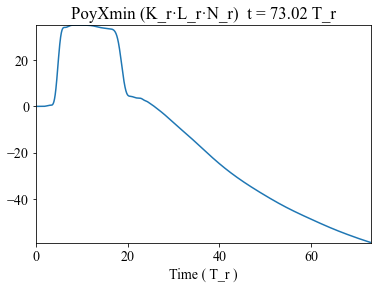

In [28]:
poytest = happi.Open("./80deg").Scalar("PoyXmin")
poytest.plot()

In [29]:
def calcCs(omegaL, kappamax, ne):
    # Calculate the three constants for the absorption equations
    c2 = omegaL / np.sqrt(ne * e**2 / (epsilon0 * me))
    c1 = np.pi * kappamax / (1 + np.sqrt(1 - kappamax))
    c3 = 2 * c1**2
    return np.array([c1, c2, c3])


def solveabs(omegaL, kappamax, ne, theta0, aL):
    # Solves absorption equations numerically
    cs = calcCs(omegaL=omegaL, kappamax=kappamax, ne=ne)
    a0 = aL * cs[1]

    def funcabs(x):
        return [
            x[1] ** 2
            - 1
            - (
                np.sin(theta0) * x[0] * a0 / (cs[0] * x[1])
                + x[0] ** 2 * a0**2 * np.cos(theta0) / (cs[0] * x[1])
            )
            ** 2
            - (np.sin(theta0) * (x[1] - 1) - x[0] * a0 * np.cos(theta0)) ** 2,
            cs[2]
            * (1 - 1 / x[1])
            * x[0]
            / (2 * np.pi * a0)
            * (np.tan(theta0) + x[0] * a0)
            - (1 - (x[0] - 1) ** 2),
        ]

    sol = fsolve(funcabs, [1.0, 1.0])
    return 1 - (sol[0] - 1) ** 2


a = S.namelist.aL


def absfunc(theta, kappamax):
    if isinstance(theta, (list, tuple, np.ndarray)):
        return [
            solveabs(omegaL=omegal, kappamax=kappamax, ne=partden, theta0=phi, aL=a)
            for phi in theta
        ]
    else:
        return solveabs(
            omegaL=omegal, kappamax=kappamax, ne=partden, theta0=theta, aL=a
        )

In [30]:
solveabs(
    omegaL=omegal,
    kappamax=0.28105,
    ne=S.namelist.partden * refn,
    theta0=0 * np.pi / 180,
    aL=S.namelist.aL,
)

0.16780497820375073

In [31]:
isinstance(angles[0], (list, tuple, np.ndarray))

False

In [32]:
kappaopt, kappacov = curve_fit(
    absfunc, angles * np.pi / 180, angleswithoutresabs, p0=[0.3]
)

In [33]:
kappaopt[0]

0.05406086897491217

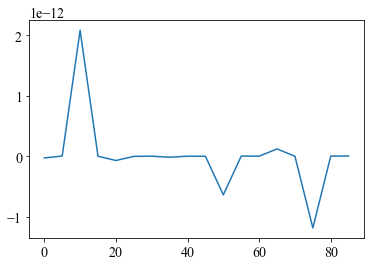

In [34]:
plt.plot(angles, [absfunc(theta * np.pi / 180, kappaopt[0]) for theta in angles])

In [35]:
def poly(data, c0, c1, c2, c3, c4):
    return c0 + c1 * data + c2 * data**2 + c3 * data**3 + c4 * data**4


def expbell(data, c0, c1, c2, c3, c4):
    return c0 * np.exp(-(data**2) / c1) + c2 * np.exp(-((data - c3) ** 2) / c4)


polyparams, polycov = curve_fit(
    expbell, angles, angleswithoutresabs, p0=[0.2, 300, 0.05, 70, 100]
)

In [36]:
polyparams

array([1.86510794e-01, 1.74644251e+02, 6.04348539e-02, 6.78612165e+01,
       4.05960654e+01])

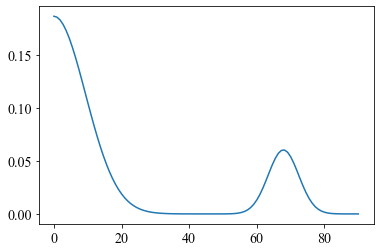

In [37]:
x = np.linspace(0, 90, 100)
plt.plot(x, expbell(x, *polyparams))

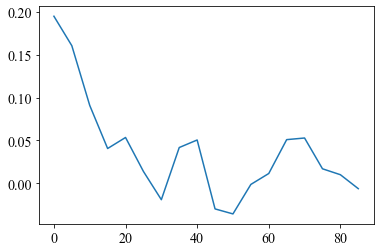

In [38]:
plt.plot(angles, angleswithoutresabs)